# Script to build barcodes

### Import :   

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os


In [2]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['figure.dpi'] = 150

In [20]:
win_nucl = []

for i in range (1,27802, 50) : # TO DO : change the step for the lenght of your alignement 
    nucl_deb = i
    if nucl_deb == 27801 :
        nucl_fin = 28845
    else : 
        nucl_fin = nucl_deb + 249
    win_nucl.append((nucl_deb,nucl_fin))

In [21]:
win_nucl

[(1, 250),
 (51, 300),
 (101, 350),
 (151, 400),
 (201, 450),
 (251, 500),
 (301, 550),
 (351, 600),
 (401, 650),
 (451, 700),
 (501, 750),
 (551, 800),
 (601, 850),
 (651, 900),
 (701, 950),
 (751, 1000),
 (801, 1050),
 (851, 1100),
 (901, 1150),
 (951, 1200),
 (1001, 1250),
 (1051, 1300),
 (1101, 1350),
 (1151, 1400),
 (1201, 1450),
 (1251, 1500),
 (1301, 1550),
 (1351, 1600),
 (1401, 1650),
 (1451, 1700),
 (1501, 1750),
 (1551, 1800),
 (1601, 1850),
 (1651, 1900),
 (1701, 1950),
 (1751, 2000),
 (1801, 2050),
 (1851, 2100),
 (1901, 2150),
 (1951, 2200),
 (2001, 2250),
 (2051, 2300),
 (2101, 2350),
 (2151, 2400),
 (2201, 2450),
 (2251, 2500),
 (2301, 2550),
 (2351, 2600),
 (2401, 2650),
 (2451, 2700),
 (2501, 2750),
 (2551, 2800),
 (2601, 2850),
 (2651, 2900),
 (2701, 2950),
 (2751, 3000),
 (2801, 3050),
 (2851, 3100),
 (2901, 3150),
 (2951, 3200),
 (3001, 3250),
 (3051, 3300),
 (3101, 3350),
 (3151, 3400),
 (3201, 3450),
 (3251, 3500),
 (3301, 3550),
 (3351, 3600),
 (3401, 3650),
 (3

### Data

In [27]:
data = pd.read_csv('D:/fichiers_AH/noeuds_communs_70_250_49.csv') # TO DO : insert the ame of csv file with your data

In [22]:
data

,Names,Unnamed: 0,1,2,3,4,5,6,7,8,...,558,559,560,561,562,563,564,565,566,567
0,KY72 + BM48_31 + BtRl + Rs4081 + Rs4255 + YN20...,*************************************************,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,BtRl + Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs...,--***********************************************,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,BtRl + Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs...,--**************************************---------,100,100,100,100,100,100,100,100,...,19,13,31,41,41,78,50,84,75,85
3,RsYN03 + RsYN09,-------------------------*-*---------------------,100,100,100,100,100,100,100,100,...,0,0,2,0,0,0,1,0,2,0
4,HKU3_12 + HKU3_1,--------------------------------------**---------,100,90,92,91,88,92,86,80,...,100,100,100,100,100,100,100,99,99,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs4237 + ...,---********----------**--------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Rp3 + LYRa11 + RsYN03 + RmYN07 + RsYN09 + HuB2...,-----------*------------****-****---****---------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,YN2018D + Rs4231 + Rs4874 + Tor2d29 + Rs3367 +...,-----*------*********----------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,YN2018D + Rs4874 + Rs3367 + RsSHC014 + Rs4084 ...,-----*-------*-****-*----------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data['mean value'] = data.mean(axis=1)

In [6]:
sorted_data = data.sort_values(by=['mean value'], ascending=False)

In [7]:
sorted_data

,Names,Unnamed: 0,1,2,3,4,5,6,7,8,...,529,530,531,532,533,534,535,536,537,mean value
0,KY72 + BM48_31 + BtRl + Rs4081 + Rs4255 + YN20...,*************************************************,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100.000000
5,Rm279 + Rm1,------------------------------**-----------------,100,100,100,100,100,100,100,100,...,99,99,100,100,100,100,100,100,100,99.644320
1,BtRl + Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs...,--***********************************************,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,98.666667
8,Jiyuan84 + Rf1 + Rf273,---------------------------------***-------------,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,93.251397
103,Longquan140 + HKU3_7 + HKU3_12 + HKU3_1,------------------------------------****---------,0,0,0,0,0,0,0,0,...,99,100,100,100,100,100,100,100,98,90.389199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs4237 + ...,---********----------**--------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.247672
240,Rs4081 + Rs4255 + Rs4237,---**--*-----------------------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.212291
195,Rf4092 + LYRa11,----------------------*-*------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.163873
51,BtRl + RpShaanxi,--*-----------------------------*----------------,5,15,9,5,7,2,2,9,...,0,0,0,0,0,0,0,0,0,0.983240


In [8]:
del data["mean value"]
del sorted_data["mean value"]

In [9]:
sorted_data.to_csv("D:/fichiers_AH/sorted_sup70_2000_49.csv", index = False)

In [3]:
sorted_data=pd.read_csv("D:/fichiers_AH/sorted_sup70_2000_49.csv")

In [4]:
sorted_data

,Names,Unnamed: 0,1,2,3,4,5,6,7,8,...,528,529,530,531,532,533,534,535,536,537
0,KY72 + BM48_31 + BtRl + Rs4081 + Rs4255 + YN20...,*************************************************,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,Rm279 + Rm1,------------------------------**-----------------,100,100,100,100,100,100,100,100,...,100,99,99,100,100,100,100,100,100,100
2,BtRl + Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs...,--***********************************************,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,Jiyuan84 + Rf1 + Rf273,---------------------------------***-------------,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,Longquan140 + HKU3_7 + HKU3_12 + HKU3_1,------------------------------------****---------,0,0,0,0,0,0,0,0,...,100,99,100,100,100,100,100,100,100,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs4237 + ...,---********----------**--------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Rs4081 + Rs4255 + Rs4237,---**--*-----------------------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,Rf4092 + LYRa11,----------------------*-*------------------------,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,BtRl + RpShaanxi,--*-----------------------------*----------------,5,15,9,5,7,2,2,9,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dic_name = {}
cmpt = 1
for i in sorted_data["Names"] :
    dic_name[i] = cmpt 
    cmpt += 1

In [6]:
dic_name

{'KY72 + BM48_31 + BtRl + Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs4237 + As6526 + YN2018C + YN2018A + Rp3 + Rs4231 + Rs4874 + Tor2d29 + Rs3367 + RsSHC014 + Rs4084 + Rs7327 + Rs9401 + YN2018B + Anlong103 + Rf4092 + YNLF_31C + LYRa11 + RsYN03 + RmYN07 + RsYN09 + F46 + HuB2013 + Rm279 + Rm1 + RpShaanxi + Jiyuan84 + Rf1 + Rf273 + Longquan140 + HKU3_7 + HKU3_12 + HKU3_1 + Rco319 + Guangxi + Guangdong + RShSTT200 + RacCS203 + RmYN02 + RpYN06 + RaTG13_V2 + SARSCoV2': 1,
 'Rm279 + Rm1': 2,
 'BtRl + Rs4081 + Rs4255 + YN2018D + Rs4247 + Rs4237 + As6526 + YN2018C + YN2018A + Rp3 + Rs4231 + Rs4874 + Tor2d29 + Rs3367 + RsSHC014 + Rs4084 + Rs7327 + Rs9401 + YN2018B + Anlong103 + Rf4092 + YNLF_31C + LYRa11 + RsYN03 + RmYN07 + RsYN09 + F46 + HuB2013 + Rm279 + Rm1 + RpShaanxi + Jiyuan84 + Rf1 + Rf273 + Longquan140 + HKU3_7 + HKU3_12 + HKU3_1 + Rco319 + Guangxi + Guangdong + RShSTT200 + RacCS203 + RmYN02 + RpYN06 + RaTG13_V2 + SARSCoV2': 3,
 'Jiyuan84 + Rf1 + Rf273': 4,
 'Longquan140 + HKU3_7 + HKU3_12 +

### Name corresponding 

### Stock into list bootstrap value per windows

In [30]:
#----------------CALCULS-----------------

win_nucl =[]
i_deb = 1
i_fin = 250 # TO DO : insert the size of the windows
pas = 50
i_milieu = ((i_deb+i_fin)-1)/2
i_pas = i_milieu + 50
for i in range(1,573): # TO DO : insert the number of windows +1
    #print(i)
    if i == 1 : 
        win_nucl.append((i_deb,i_pas))
        i_milieu = i_milieu + pas
        i_deb = i_deb + pas
        i_fin = i_fin + pas
        i_pas = i_pas + pas
    if i == 571 :
        win_nucl.append((i_milieu+1 ,28845))
        i_milieu = i_milieu + pas
        i_deb = i_deb + pas
        i_fin = i_fin + pas
        i_pas = i_pas + pas
        
        
    else : 
        win_nucl.append((i_milieu+1 ,i_pas))
        i_milieu = i_milieu + pas
        i_deb = i_deb + pas
        i_fin = i_fin + pas
        i_pas = i_pas + pas
    

l_row_csv = []
l_col_csv =[]

data_tolist = data.values.tolist()

for x in range(0,255): # TO DO : insert the number of rows in your data
    l_col_csv =[]
    for i,j in zip(win_nucl,data_tolist[x][2:]):
        l_col_csv.append((i,j))
    l_row_csv.append(l_col_csv)
    
print(len(l_row_csv))
print(len(l_row_csv[0]))

#----------------FIN CALCULS-----------------

255
572


In [31]:
l_row_csv[254]

[((1, 175.0), 0),
 ((176.0, 225.0), 0),
 ((226.0, 275.0), 0),
 ((276.0, 325.0), 0),
 ((326.0, 375.0), 0),
 ((376.0, 425.0), 0),
 ((426.0, 475.0), 0),
 ((476.0, 525.0), 0),
 ((526.0, 575.0), 0),
 ((576.0, 625.0), 0),
 ((626.0, 675.0), 0),
 ((676.0, 725.0), 0),
 ((726.0, 775.0), 0),
 ((776.0, 825.0), 0),
 ((826.0, 875.0), 0),
 ((876.0, 925.0), 0),
 ((926.0, 975.0), 0),
 ((976.0, 1025.0), 0),
 ((1026.0, 1075.0), 0),
 ((1076.0, 1125.0), 0),
 ((1126.0, 1175.0), 0),
 ((1176.0, 1225.0), 0),
 ((1226.0, 1275.0), 0),
 ((1276.0, 1325.0), 0),
 ((1326.0, 1375.0), 0),
 ((1376.0, 1425.0), 0),
 ((1426.0, 1475.0), 0),
 ((1476.0, 1525.0), 0),
 ((1526.0, 1575.0), 0),
 ((1576.0, 1625.0), 0),
 ((1626.0, 1675.0), 0),
 ((1676.0, 1725.0), 0),
 ((1726.0, 1775.0), 0),
 ((1776.0, 1825.0), 0),
 ((1826.0, 1875.0), 0),
 ((1876.0, 1925.0), 0),
 ((1926.0, 1975.0), 0),
 ((1976.0, 2025.0), 0),
 ((2026.0, 2075.0), 0),
 ((2076.0, 2125.0), 0),
 ((2126.0, 2175.0), 0),
 ((2176.0, 2225.0), 0),
 ((2226.0, 2275.0), 0),
 ((2276

### Set the color of the boostrap values

In [9]:
#----------------FONCTION LIMITES-----------------

def limites(x):
    if x < 30:
        return "r"
    
    if x > 70:
        return "darkgreen"
    
    return "grey"

#----------------FIN FONCTION LIMITES-----------------

### Plot

C:\Users\opale\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


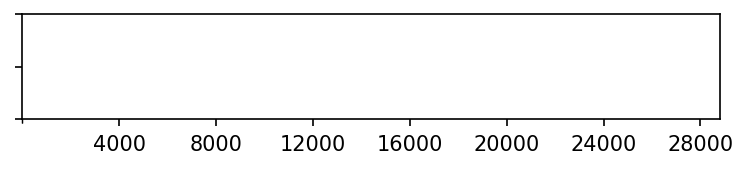

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

<Figure size 900x600 with 0 Axes>

In [33]:
fig, ax = plt.subplots()
plt.xlim(1,28800)
plt.ylim(0,1)
plt.subplots_adjust(top = 0.3)
ax.set_yticklabels([])
ax.set_xticks([1, 3], minor = True)
ax.xaxis.set_major_locator(MultipleLocator(4000))

for i in range(len(l_row_csv)) :
#for i in range(126,127) :
    
    fig, ax = plt.subplots()
    plt.xlim(1,28800)
    plt.ylim(0,1)
    plt.subplots_adjust(top = 0.3)
    ax.set_yticklabels([])
    ax.xaxis.set_visible(False)
    ax.set_xticks([1, 3], minor = True)
    ax.xaxis.set_major_locator(MultipleLocator(4000))

    for el in l_row_csv[i]:
        ax.plot()
        col = limites(el[1])
        ax.axvspan(el[0][0], el[0][1]+1, alpha=0.8, facecolor= col , edgecolor = 'none')

    jpp = data["Names"][i]
    #print(jpp)
    #plt.title(str(dic_name[jpp]))        
    plt.savefig("D:/fichiers_AH/Barcodes_align49/CB_250_49_fixed_raw/CB_"+str(dic_name[jpp]) + ".png") # TO DO : insert where you want to save the plots
    plt.clf()
    #print(str(dic_name[jpp]) + " " + jpp)


plt.show()

In [54]:
for i in range(1,538):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
